# Practical Assignment I: Multilayer Perceptron from Scratch

In this notebook you will implement a simple neural network without relying on machine learning or deep learning libraries.

**Learning objectives:**

At the end of this notebook, you will be able to:

- Implement the basic structure of a MLP, including activation functions and methods to calculate accuracy and loss.
- Implement a naive gradient descent algorithm to train a MLP from scratch.
 
**Notebook contents:**
 
 - Introduction
 - Task 1: Build an MLP
    - Given an MLP architecture (e.g. `[2, 3, 1]`), you will define a function that returns random weights and biases around zero.
 - Task 2: Sigmoid Activation Function
    - In this task, you will implement a sigmoid activation function.
 - Task 3: Predict Function
    - In this task, you will implement a predict function.
 - Task 4: Calculate Accuracy
    - In this task, you will define and implement a function that calculates accuracy.
 - Task 5: Loss Function
    - In this task, you will define and implement a function that calculates mean square error (loss).
 - Task 6: Gradient Descent
    - In this task, you will create a function that implements a naive gradient descent algorithm.
 - Final Result: Training and Testing the MLP 

**Packages:**

Let's start by importing the basic packages required for this DataLab:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Introduction

**The neural network**

In this notebook you will build and train the following Multilayer Perceptron for binary classification:

<img src="https://edirlei.com/images/mlp3.png" width="600"> 

<strong>Figure 1: The MLP architecture you will build.</strong>


This network consists of:
- One input layer with 2 units
- One hidden layer with 3 units (sigmoid activation functions)
- One output layer with 1 unit (sigmoid activation function)
- 9 weights



We can represent this architecture succinctly as a list of layers where each layer is an integer representing the number of units:

In [2]:
nn_architecture = [2, 3, 1]

We will refer to these layers by a `layer_id`. Since Python is 0-indexed, input layer will be layer 0, hidden layer will be layer 1 and the output layer will be layer 2. Then we can easily access the number of units in a layer, for example layer 1, using `layer_id` as follows:

In [3]:
layer_id = 1
units = nn_architecture[layer_id]
print(f'There are {units} units in layer {layer_id}.')

There are 3 units in layer 1.


**The dataset**

For this notebook, we are going to use a binary classification dataset created by the following code:

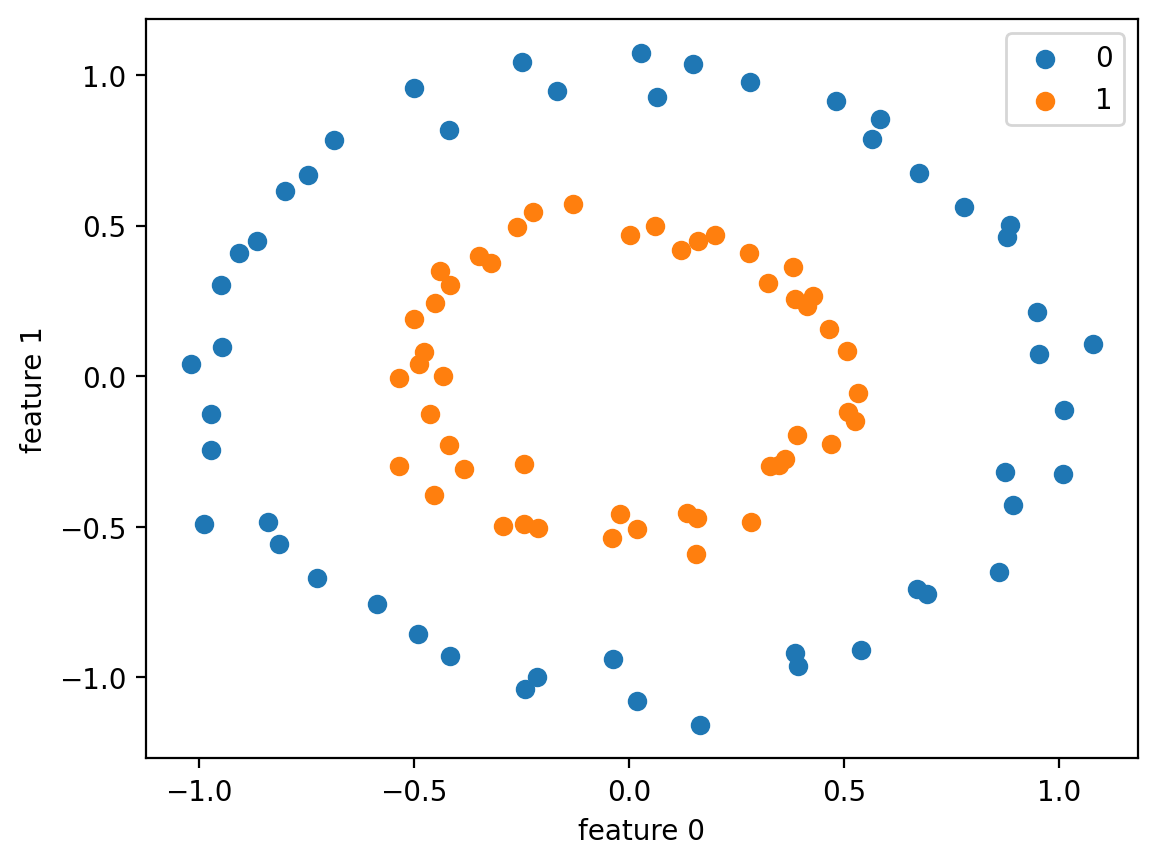

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=0)
plt.figure(dpi=200)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label=0)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label=1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

Now we can reshape the y array visualize the dimensions of the dataset:

In [5]:
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 2), (100, 1))

# Task 1: Build an MLP

Now, to create and use weights and biases, it is useful to have a notation to refer to each weight and bias. We are going to use the same notation that you studied yesterday when learning about how to calculate the output of a multilayer perceptron.

<img src="https://edirlei.com/images/mlp3.png" width="600">

<strong>Figure 2: Notation for weights, biases and units in the MLP used for this task.</strong>


In the notation used in Figure 5, each weight is represented as $w^{(l)}_{i,j}$ where

- $l$: defines the weight's connecting layer ($l$ to layer $l+1$)

- $i$: $i^{th}$ unit in layer $l$

- $j$: $j^{th}$ unit in layer $l+1$

According to this definition, weights connecting layer 0 to layer 1 can be written as:

$w^{(0)}=\begin{pmatrix}
w^{(0)}_{0,0} & w^{(0)}_{0,1} & w^{(0)}_{0,2}\\
w^{(0)}_{1,0} & w^{(0)}_{1,1} & w^{(0)}_{1,2}
\end{pmatrix}$

We can initialize random values to the weights of $w^{(0)}$ using the function ``np.random.randn()`` (you can read more about this function [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)):

In [6]:
w0 = np.random.randn(2, 3)
w0

array([[-1.95809307,  0.40630503, -0.88094364],
       [ 1.45945512,  0.59840404,  0.02374598]])

Similarly, remaining weights and biases are:

$w^{(1)}=\begin{pmatrix}
w^{(1)}_{0,0}\\
w^{(1)}_{1,0}\\
w^{(1)}_{2,0}\\
\end{pmatrix}$

$b^{(0)}=\begin{pmatrix}
b^{(0)}_{0} b^{(0)}_{1} b^{(0)}_{2}
\end{pmatrix}$


$b^{(1)}=\begin{pmatrix}
b^{(1)}_{0}\\
\end{pmatrix}$

Notice that the shape of a weight matrix ($w^{(l)}$) is (number of units in layer $l$, number of units in layer $l+1$).

In [7]:
w0.shape

(2, 3)

And, the shape of a bias matrix ($b^{(l)}$) is (1, number of units in layer $l + 1$)

Understanding this is crucial for:
- initializing weights and biases
- implementing a forward-pass (the predict function)
- accessing individual weights and biases
- updating weights and biases

For example, if we have a list of all weights called `weights`:

In [8]:
w1 = np.random.randn(3, 1)
weights = [w0, w1]
weights

[array([[-1.95809307,  0.40630503, -0.88094364],
        [ 1.45945512,  0.59840404,  0.02374598]]),
 array([[-0.69208695],
        [ 1.92337133],
        [ 0.73012831]])]

We can access $w^{(1)}_{2,0}$ as

In [13]:
weights[1][2, 0]

0.730128311592832

Try it yourself: print out the value of $w^{(0)}_{1,2}$

In [10]:
weights[0][1, 2]

0.02374598260429538

Now you are ready to define the initializer. Use function `np.random.randn()` to initialize weights and biases from the standard normal distribution.

We can represent all the parameters of the model with two lists:
- `weights` is a list containing $w^{(l)}$ arrays;
- `biases` is a list containing $b^{(l)}$ arrays.

For example, in our case the model `nn_architecture = [2, 3, 1]` will have the following parameters:

`weights = [w0, w1]`

`biases = [b0, b1]`

As you may recall, these arrays are:

$w^{(0)}=\begin{pmatrix}
w^{(0)}_{00} & w^{(0)}_{01} & w^{(0)}_{02}\\
w^{(0)}_{10} & w^{(0)}_{11} & w^{(0)}_{12}
\end{pmatrix}$

$w^{(1)}=\begin{pmatrix}
w^{(1)}_{0,0}\\
w^{(1)}_{1,0}\\
w^{(1)}_{2,0}\\
\end{pmatrix}$

$b^{(0)}=\begin{pmatrix}
b^{(0)}_{0} b^{(0)}_{1} b^{(0)}_{2}
\end{pmatrix}$

$b^{(1)}=\begin{pmatrix}
b^{(1)}_{0}\\
\end{pmatrix}$

Now it's your time to code! Define the `initializer()` function such that it returns `weights` and `biases` for any given `nn_architecture`.

In [22]:
# Task 1
def initializer(nn_architecture):
    '''
    Given
    - the number of layers 
    - the number of units in each layer
    initializes network parameters (weights and biases)
    
    Arguments
        nn_architecture: a list of integers
                         length of the list is the number of layers
                         each item in the list specifies 
                         the number of units in that layer
    Returns
        weights: list of numpy arrays, w0, w1, ...
        biases: list of numpy arrays, b0, b1, ...
        
    '''
    weights = []
    biases = []
    
    for i in range(1, len(nn_architecture)): 
        w = np.random.randn(nn_architecture[i-1], nn_architecture[i]) # w0, w1, ...
        b = np.random.randn(1, nn_architecture[i]) # b0, b1, ...
        weights.append(w) 
        biases.append(b)
    return weights, biases

Now we can call the function to initialize the weights and biases:

In [23]:
weights, biases = initializer([2, 3, 1])

If you implemented the function correctly, `nn_architecture=[2, 3, 1]` should return weights and biases with shapes:

- `weights[0].shape == (2, 3)`
- `weights[1].shape == (3, 1)`
- `biases[0].shape == (1, 3)`
- `biases[1].shape == (1, 1)`

Check the shapes to see if they are correct:

In [24]:
print(weights[0].shape, 
weights[1].shape, 
biases[0].shape, 
biases[1].shape)

(2, 3) (3, 1) (1, 3) (1, 1)


## Task 2: The Sigmoid Activation Function

For this task you need to implement the sigmoid activation function, which is defined by the following equation:

$sigmoid(x) = 1/(1+e^{-x})$

Write the code for the function.

- Hint: you can use function ``np.exp()`` to calculate $e^{-x}$. Check more information about this function [here](https://numpy.org/doc/stable/reference/generated/numpy.exp.html).

In [29]:
# Task 2
def sigmoid(x):
    '''
    Calculates the sigmoid of an input
    Arguments
        x: np.array() of real numbers
    Returns
        np.array() of real numbers between 0 and 1
    
    '''
    sig = 1/(1 + np.exp(-x))
    
    return sig

If you implemented the function correctly, the code below should plot the following:

<img src="https://edirlei.com/images/output_mlp1.png" width="500">

<strong>Figure 3: The sigmoid function.</strong>

Text(0, 0.5, '$1/(1+e^{-x})$')

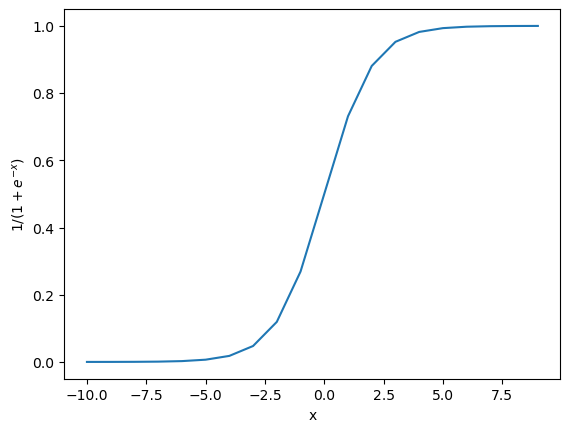

In [30]:
plt.plot(np.arange(-10, 10), sigmoid(np.arange(-10, 10)))
plt.xlabel('x')
plt.ylabel('$1/(1+e^{-x})$')

## Task 3: Predict

For this task you need to implement the predict function.

Let's start by looking at the Keras documentation for the `Dense` layer, which indicates that:

> `Dense` implements the operation: `output = activation(dot(input, kernel) + bias)` where `activation` is the element-wise activation function passed as the `activation` argument, `kernel` is a weights matrix created by the layer, and `bias` is a bias vector created by the layer. These are all attributes of Dense.

Now let's look back to the MLP notation and understand how we can calculate the output unit ($a^{(2)}_{0}$) from input units ($x_0$ and $x_1$). This is what `predict` method is all about.

<img src="https://edirlei.com/images/mlp3.png" width="500">

**Figure 4: How to calculate $a^{(2)}_{0}$ from $x_0$ and $x_1$?**

For this task, we need to calculate the output of the units in layer 1 based on the input values from layer 0 (like you did in yesterday's exercises). Then, we calculate the output of the unit in layer 2 based on the output from the units in layer 1.  

- Layer 1 unit values:

    $a^{(1)}_{0} = sigmoid((x_0 \times w^{(0)}_{0,0}) + (x_1 \times w^{(0)}_{1,0}) + (1 \times b^{(0)}_{0}))$

    $a^{(1)}_{1} = sigmoid((x_0 \times w^{(0)}_{0,1}) + (x_1 \times w^{(0)}_{1,1}) + (1 \times b^{(0)}_{1}))$

    $a^{(1)}_{2} = sigmoid((x_0 \times w^{(0)}_{0,2}) + (x_1 \times w^{(0)}_{1,2}) + (1 \times b^{(0)}_{2}))$

- Layer 2 unit value (the output):

    $a^{(2)}_{0} = sigmoid((a^{(1)}_{0} \times w^{(1)}_{0,0}) + (a^{(1)}_{1} \times w^{(1)}_{1,0}) + (a^{(1)}_{2} \times w^{(1)}_{2,0}) + (1 \times b^{(1)}_{0}))$

Although it is possible to write for loops to implement these operations, it will be much more efficient to use linear algebra and vectorization:

- Layer 1:

    $a^{(1)} = sigmoid(x\cdot w^{(0)} + b^{(0)})$

    where:

    $a^{(1)}=\begin{pmatrix}
    a^{(1)}_{0} & a^{(1)}_{1} & a^{(1)}_{2}
    \end{pmatrix}$

    $x=\begin{pmatrix}
    x_{0} & x_{1}
    \end{pmatrix}$

    $w^{(0)}=\begin{pmatrix}
    w^{(0)}_{0,0} & w^{(0)}_{0,1} & w^{(0)}_{0,2}\\
    w^{(0)}_{1,0} & w^{(0)}_{1,1} & w^{(0)}_{1,2}
    \end{pmatrix}$

    $b^{(0)}=\begin{pmatrix}
    b^{(0)}_{0} & b^{(0)}_{1} & b^{(0)}_{2}
    \end{pmatrix}$

- Layer 2:

    $a^{(2)} = sigmoid(a^{(1)}\cdot w^{(1)} + b^{(1)})$

    where:

    $a^{(2)}=\begin{pmatrix}
    a^{(2)}_{0}
    \end{pmatrix}$

    $a^{(1)}=\begin{pmatrix}
    a^{(1)}_{0} & a^{(1)}_{1} & a^{(1)}_{2}
    \end{pmatrix}$

    $w^{(1)}=\begin{pmatrix}
    w^{(1)}_{0,0}\\
    w^{(1)}_{1,0}\\
    w^{(1)}_{2,0}\\
    \end{pmatrix}$

    $b^{(1)}=\begin{pmatrix}
    b^{(1)}_{0}\\
    \end{pmatrix}$

If we compare these equations with the definition presented in Keras documentation, we will see that they represent the same equation (with different notations):

- Our equation: $a^{(1)} = sigmoid(x\cdot w^{(0)} + b^{(0)})$

- Keras definition: `output = activation(dot(input, kernel) + bias)`

Now it's your time to code! Define the `predict()` function to calculate the output of an MLP, given the input (X) and the parameters (weights, biases):

In [48]:
# Task 3
def predict(X, weights, biases):
    '''
    Given an input and NN parameters,
    this function calculates the output
    
    Arguments
        X: np.array() of shape 
        (#datapoints, #features)
        weights: list of np arrays
        biases: list of np arrays
    Returns
        y_pred: np.array() of shape
        (#datapoints, #classes)
    
    '''
    
    # Layer 1 output
    for i in range(len(weights)):
        X = sigmoid(np.dot(X, weights[i]) + biases[i])
    y_pred = X
    return y_pred

Now we can call the ``predict`` function to calculate the output of the MLP:

In [49]:
y_pred = predict(X, weights, biases)

If you implemented the function correctly, `y_pred.shape` should be `(#datapoints, #classes)`, which is `(100, 1)` in our case.

In [50]:
y_pred.shape

(100, 1)

If the function is implemented correctly, the code below should plot something similar to Figure 5, where the x-axis shows each datapoint by id and the y-axis shows its value. Blue dots are the labels (0 or 1) and orange dots are the predictions (between 0 and 1). Blue and orange dots corresponding to the same datapoint are connected by a red line which represents the error. Shorter the red lines, better the predictions.

<img src="https://edirlei.com/images/output_mlp2.png" width="600">

**Figure 5: Predictions from an untrained MLP.**

Run the code below to test check the results. In your case, the predictions can be different due to random initialization. But the error must still be high.

Text(0, 0.5, 'Output')

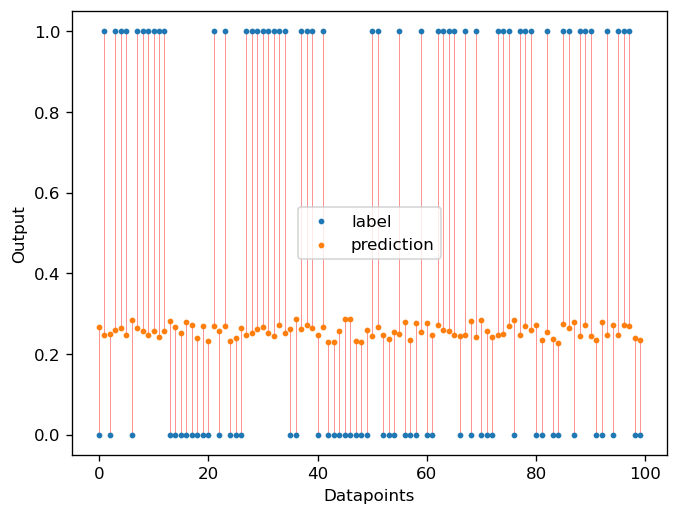

In [51]:
plt.figure(dpi=120)

for i in range(0, y.shape[0]):
    plt.plot([i, i], [y[i], y_pred[i]], color='red', zorder=-10, alpha=0.5, linewidth=0.5)

plt.scatter(np.arange(0, y.shape[0]), y, label='label', s=6)
plt.scatter(np.arange(0, y_pred.shape[0]), y_pred, label='prediction', s=6)

plt.legend()
plt.xlabel('Datapoints')
plt.ylabel('Output')

Notice that the predictions are:
- Between 0 and 1, due to sigmoid activation function;
- Random, i.e. accuracy is ~50% because the networks is not yet trained;
- Not binary, i.e. if you want to calculate accuracy you need to convert these to binary using a discrimination threshold, such as 0.5.

## Task 4: Calculate Accuracy

For this task you need to define a function that calculates accuracy.

- If implemented correctly, the accuracy of an untrained network should be around 0.5.

Let's start by converting predictions to a binary classification, so then we can easily calculate accuracy:

In [41]:
# convert to binary
y_pred_binary = 1*(y_pred > 0.5)

Now it's your time to code! Define the `accuracy()` function to calculate the accuracy of the given binary predictions:

In [58]:
# Task 4
def accuracy(y_pred_binary, y):
    '''
    Given 
    -binary predictions
    -labels
    calculates accuracy
    Accuracy = Correct Pred/ Total Pred
    '''
    correct_pred=  0
    for i in range(len(y)):
        if y_pred_binary[i] == y[i]:
            correct_pred += 1 


    acc = correct_pred / len(y) 
    
    return acc

Now we can call the ``accuracy`` function:

In [57]:
acc = accuracy(y_pred_binary, y)
acc

0.5

If everything is correctly implemented, the accuracy should be around 0.5 (accuracy of an untrained network).

## Task 5: Loss Function

For this task, you need to define a function that calculates loss.

The loss function measures the difference between the predictions and the labels (gradient descent methods aim at minimizing this loss). Therefore, we need to define a loss function to train an MLP.

There are several types of loss functions. You can check the Keras documentation to see the available options (https://keras.io/api/losses/). In this task, you are expected to implement a loss function based on mean squared error (MSE). The MSE equation is:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-y\_pred_i)^2$

Now it's your time to code! Define the `loss_function()` to calculate the loss:
- Hint: use the `predict` function to calculate $y\_pred_i$.

In [72]:
# Task 5
def loss_function(X, y, weights, biases):
    '''
    Given
    - X, y, weights, biases
    
    calculates the mean squared error (mse)
    '''
    MSE = 0
    for i in range(len(y)):
        MSE += (y[i] - predict(X[i], weights, biases)**2)/len(y)
    return MSE

Now we can call the `loss_function` and to see the calculated loss:

In [73]:
loss = loss_function(X, y, weights, biases)
loss

array([[0.43375289]])

## Task 6: Gradient Descent

The final task for this week is to implement a naive version of the gradient descent algorithm. **This task is expected to be done in Friday's DataLab**.

Gradient descent is the essence of neural networks. It is an optimization algorithm that is commonly used to train neural networks.

When we initialize a network we have random weights and biases (Task 1). We would like to update the parameters such that the loss decreases. Loss is the difference between predictions and labels. Decreasing loss means improving predictions.

To have a simplified overview of the learning process, we can consider the following steps:

1. Calculate the loss using `loss_function(X, y, weights, biases)`;
2. Update weights slightly to reduce loss;
3. Repeat steps 1 and 2 n times (n is called the number of epochs).

The gradient decent update rule is:

`updated_weigths = current_weights - learning_rate * gradient of the loss function`

`updated_biases = current_biases - learning_rate * gradient of the loss function`

**What is the gradient and how to calculate it?**

In our case, the gradient is the direction and rate of the fastest increase of the loss function ($L$). The Nabla symbol ($\nabla$) represents the gradient operation. We can use the following notation to represent the gradient of the loss function:

$\nabla L$

We would like to decrease the loss. To achieve this, we want to update the weights in the opposite direction of the gradient ($-\nabla L$) using a step size called learning rate ($lr$). Therefore, to we add $lr$ to the equation:

$-lr*\nabla L$

We also need to consider that gradient is defined as the partial derivatives of loss with respect to each weight ($\frac{\partial L}{\partial w}$) and bias ($\frac{\partial L}{\partial b}$). Therefore, the gradient decent update rule for each weight and bias is defined as:

$w_{updated} = w - lr * \frac{\partial L}{\partial w}$

$b_{updated} = b - lr * \frac{\partial L}{\partial b}$

If we can calculate the partial derivatives, we are done! Gradient is typically calculated using backpropagation, but it is out of the scope of this DataLab. Therefore, we will use a simpler method to estimate the partial derivatives.

Let's understand this by estimating partial derivative of a single parameter $\frac{\partial L}{\partial w^{(0)}_{0,0}}$:

1. Identify the initial value of the parameter $w^{(0)}_{0,0}$. 
    - Let's assume that the initial value is 0.3 in this example.
2. Calculate the loss using function `loss_function(X, y, weights, biases)`.
    - Let's assume also that the loss is 0.5 in this example.
3. Add a very small number to $w^{(0)}_{0,0}$. Small numbers are typically represented by epsilon. 
    - Let's assume `epsilon=1e-4` for this example, so we have: $w^{(0)}_{0,0}+10^{-4}$
4. Freeze all weights and biases, so you only update $w^{(0)}_{0,0}$.
    - In our example, we change $w^{(0)}_{0,0}$ to $w^{(0)}_{0,0}+10^{-4}$.
5. Calculate the loss again.
    - Let's assume also that the new loss is 0.51.
6. Now we can estimate $\frac{\partial L}{\partial w^{(0)}_{0,0}}$.
    - In this example, we have: $\frac{0.51-0.5}{10^{-4}}$ (i.e., change in loss divided by change in the parameter).
7. Then we can use the update rule to calculate the new value of the weight ($w_{updated} = w - lr * \frac{\partial L}{\partial w}$).
    - In this example, we have: $w^{(0)}_{0,0} = 0.3 - lr*\frac{0.51-0.5}{10^{-4}}$
8. Repeat this process for all weights and biases. 
    - This iteration represents one epoch of gradient descent.
9. Repeat the whole process for a certain number of epochs.

Now it's your time to code! It will be easier to implement this algorithm by breaking it into subtasks, so let's see all subtasks and how they relate to the steps presented above:

- **Task 6.1**: Define a function to update a single weight given all weights of an MLP (Step 4).

- **Task 6.2**: Define a function to update a single bias given all biases of an MLP (Step 4, but considering biases instead of weights).

- **Task 6.3**: Now it's time to estimate the partial derivatives. Define a function that can add a small number (epsilon) to a weight (Steps 3 and 4) and calculates the change in loss (Step 6). Do this for all weights and biases.

- **Task 6.4**: Implement a one-step gradient descent (Steps 7 and 8).

- **Task 6.5**: Implement a function to repeat the one-step gradient descent for a given number of epochs (Step 9).

### Task 6.1: Update a Single Weight

For this subtask, you need to write a function to update a single weight given all weights of an MLP. 

In this function you will need to create a copy of the weights, so you can update the copy instead of the original weights. You can do this by using the `deepcopy()` function. You can read more about this function [here](https://docs.python.org/3/library/copy.html#copy.deepcopy).

Let's start by importing `deepcopy`:

In [1]:
from copy import deepcopy

Now it's your time to write the `weight_update` function:

In [ ]:
# Task 6.1
def weight_update(weights, layer_id, i, j, new_param):
    '''
    Given a single weight defined by (layer_id, i, j)
    updates it with a new parameter (new_param)
    
    Arguments
        weights: list of np.arrays()
        layer_id: integer
        i: integer
        j: integer
        new_param: float
    Return
        new_w: list of np.arrays()
               where only a single value is changed
               compared to weights
    
    '''
    # It is important to create a copy of the weights and update the copy
    new_w = deepcopy(weights)
    
          
    
    return new_w

If you implemented this function correctly, you should be able to update a single weight by any number you want. For example:

`weight_update(weights, layer_id=0, i=1, j=2, new_param=100)`

Returns:

`[array([[  2.251381  ,   0.64684183,  -0.64151649],
        [ -1.36932189,   0.40760834, 100.        ]]),
 array([[-1.19154029],
        [ 1.00992592],
        [-1.06756383]])]`

Test your function to see if it is working as expected:

In [ ]:
new_weights = weight_update(weights, 0, 1, 2, 100)
np.set_printoptions(suppress=True) #suppresses the use of scientific notation for small numbers
new_weights

### Task 6.2: Update a Single Bias

For this subtask, you need to write a function to update a single bias given all biases of an MLP.

The implementation of this function is very similar to the weight_update function, but instead of updating a weight it updates a bias.

Now write the `bias_update` function:

In [ ]:
# Task 6.2
def bias_update(biases, layer_id, j, new_param):
    '''
    Given a single bias defined by (layer_id, j)
    updates it with a new parameter (new_param)
    
    Arguments
        biases: list of np.arrays()
        layer_id: integer
        j: integer
        new_param: float
    Return
        new_b: list of np.arrays()
               where only a single value is changed
    
    '''
    
    # It is important to create a copy and update the copy
    new_b = deepcopy(biases)
    
    # YOUR CODE HERE #
    
    return new_b

If you implemented this function correctly, you should be able to update a single bias by any number you want. For example:

`bias_update(biases, 1, 0, 100)`

Returns:

`[array([[ 0.52314685,  0.52558741, -1.3361372 ]]), array([[100.]])]`

Test your function to see if it is working as expected:

In [ ]:
new_biases = bias_update(biases, 1, 0, 100)
new_biases

### Task 6.3: Estimate the Partial Derivatives

For this task you need to estimate the partial derivatives for all weights and biases. Therefore, you are expected to define the function `gradient_estimator` as explained in the code bellow.

It's important to remember all the steps of the process:

1. Identify the initial value of the parameter $w^{(0)}_{0,0}$. 
    - Let's assume that the initial value is 0.3 in this example.
2. Calculate the loss using function `loss_function(X, y, weights, biases)`.
    - Let's assume also that the loss is 0.5 in this example.
3. Add a very small number to $w^{(0)}_{0,0}$. Small numbers are typically represented by epsilon. 
    - Let's assume `epsilon=1e-4` for this example, so we have: $w^{(0)}_{0,0}+10^{-4}$
4. Freeze all weights and biases, so you only update $w^{(0)}_{0,0}$.
    - In our example, we change $w^{(0)}_{0,0}$ to $w^{(0)}_{0,0}+10^{-4}$.
5. Calculate the loss again.
    - Let's assume also that the new loss is 0.51.
6. Now we can estimate $\frac{\partial L}{\partial w^{(0)}_{0,0}}$.
    - In this example, we have: $\frac{0.51-0.5}{10^{-4}}$ (i.e., change in loss divided by change in the parameter).
7. Then we can use the update rule to calculate the new value of the weight ($w_{updated} = w - lr * \frac{\partial L}{\partial w}$).
    - In this example, we have: $w^{(0)}_{0,0} = 0.3 - lr*\frac{0.51-0.5}{10^{-4}}$
8. Repeat this process for all weights and biases. 
    - This iteration represents one epoch of gradient descent.
9. Repeat the whole process for a certain number of epochs.

For this task, you will be performing steps 3, 4 and 6. Notice that you already implemented step 4 in functions `weight_update` and `bias_update`, so now you can simply call these functions when needed.

Now write the `gradient_estimator` function based on the provided structure:

In [ ]:
# Task 6.3
def gradient_estimator(X, y, weights, biases):
    '''
    This function estimates
    
    ∂(loss_function)/∂(w_ij) and
    ∂(loss_function)/∂(b_ij)
    
    for every weight and bias.
    
    ∂(loss_function)/∂(w_ij) can be estimated by
    [(loss for w_ij+epsilon) - (loss with w_ij)]/epsilon
    
    likewise
    
    ∂(loss_function)/∂(b_ij) can be estimated by
    [(loss for b_ij+epsilon) - (loss with b_ij)]/epsilon
    
    For each parameter in weights and biases,
    the function will estimate
    ∂(loss_function)/∂(w_ij) and ∂(loss_function)/∂(b_ij)
    and return a list of np.arrays()
    called w_pds and b_pds, respectively.
    
    Arguments
        X: input data
        y: labels
        weights: list of np arrays, weights of the MLP
        biases: list of np arrays, biases of the MLP
    Returns
        w_pds: list of np arrays, same dimensions with weights
        b_pds: list of np arrays, same dimensions with biases
    '''
    eps = 1e-4
    loss_val = loss_function(X, y, weights, biases)
    
    # partial derivatives for weights
    w_pds = []
    for layer_id, layer_w in enumerate(weights):
        pd_array = np.zeros(layer_w.shape)
        
        # Calculate the partial derivative (pd) for each weight
        # and save those values into pd_array

        # YOUR CODE HERE
                        
        w_pds.append(pd_array)

    # partial derivatives for biases
    b_pds = []
    for layer_id, layer_b in enumerate(biases):
        pd_array = np.zeros(layer_b.shape)
        
        # Calculate the partial derivative (pd) for each bias 
        # and save those values into pd_array
        
        # YOUR CODE HERE
            
        b_pds.append(pd_array)
    
    return w_pds, b_pds

If you implemented this function correctly, you should be able to calculate the partial derivatives for a given set of weights and biases. For example, if we input the following weights and biases:

`test_weights = 
[array([[-0.42404982, -0.50056718,  0.98879037],
        [ 0.26926513,  1.1310352 , -1.66303788]]),
 array([[-1.75955896],
        [ 0.89968033],
        [ 0.34920988]])]`

`test_biases = 
[array([[ 0.52314685,  0.52558741, -1.3361372 ]]), array([[-1.23776831]])]`

The function should return:

`weights_pds = 
[array([[-0.00057709,  0.00019728, -0.00010618],
        [-0.00038497,  0.00048796,  0.00038792]]),
 array([[-0.05642216],
        [-0.05617856],
        [-0.01945059]])]`
        
`biases_pds = 
[array([[ 0.03671648, -0.01855126, -0.00522559]]), array([[-0.08967007]])]`

Test your function to see if it is working as expected:

In [ ]:
test_weights = [np.array([[-0.42404982, -0.50056718,  0.98879037], [ 0.26926513,  1.1310352 , -1.66303788]]), 
                np.array([[-1.75955896], [ 0.89968033], [ 0.34920988]])]

test_biases = [np.array([[ 0.52314685,  0.52558741, -1.3361372 ]]), 
               np.array([[-1.23776831]])]

weights_pds, biases_pds = gradient_estimator(X, y, test_weights, test_biases)
print(weights_pds)
print(biases_pds)

### Task 6.4: One-Step Gradient Descent

For this task, you need to implement a function to perform a one-step gradient descent, which is related to steps 6 and 7 of the process:

7. Then we can use the update rule to calculate the new value of the weight ($w_{updated} = w - lr * \frac{\partial L}{\partial w}$).
    - In this example, we have: $w^{(0)}_{0,0} = 0.3 - lr*\frac{0.51-0.5}{10^{-4}}$
8. Repeat this process for all weights and biases.

Therefore, write the `one_step_gradient_descent` function based on the provided structure:

In [ ]:
def one_step_gradient_descent(X, y, weights, biases, lr):
    '''
    This function executes one step of gradient decent and updates weights and biases.
    
    First estimate the gradient using the gradient_estimator function implemented 
    in the previous task. 
    
    Then, update the params by:
    w = w - lr * w_pds
    b = b - lr * b_pds
    
    Arguments:
        X: input data
        y: labels
        weights: NN weights
        biases: NN biases
        lr: learning rate, a float
    Returns:
        new_w: updated weights, same size as weights
        new_b: updated biases, same size as biases
    
    '''
    w_pds, b_pds = gradient_estimator(X, y, weights, biases)
    
    new_w = []
    # For each weight array in weights list
    # use gradient descent update rule
    # append the array to new_w list
    
    # YOUR CODE HERE #

    new_b = []
    # For each bias array in biases list
    # use gradient descent update rule
    # append the array to new_b list
    
    # YOUR CODE HERE #
        
    return new_w, new_b

If you implemented this function correctly, one step of gradient decent should decrease loss for a small enough learning rate.

Example:

`loss = loss_function(X, y, weights, biases)`

`loss is 0.36982`

`new_weights, new_biases = one_step_gradient_descent(X, y, weights, biases, lr = 0.01)`

`loss = loss_function(X, y, new_w, new_b)`

`loss is 0.36965`

Test your function to see if it is working as expected:
- Notice that you will see different values for the loss as the weights and biases were randomly generated, but it is important to check if the loss decreased.

In [ ]:
loss = loss_function(X, y, weights, biases)
print("Loss before one step gradient decent: " + str(loss))
new_weights, new_biases = one_step_gradient_descent(X, y, weights, biases, lr = 0.01)
loss = loss_function(X, y, new_weights, new_biases)
print("Loss after one step gradient decent: " + str(loss))

### Task 6.5: Repeat the One-Step Gradient Descent

For this task you need to repeat the one-step gradient descent process for a given number of epochs. This is the last step of the process.

Therefore, write the `gradient_descent` function based on the provided structure:
- Notice in the structure of the function that you need to save the error (loss) to the `error` array at every iteration, so we can plot error curve at the end of the process.

In [ ]:
# Task 6.5
def gradient_descent(X, y, weights, biases, epoch, lr):
    '''
    Repeats one_step_gd()
    for given number of epochs
    Saves and plots the error at each epoch
    Arguments
        X: input data
        y: labels
        weights: NN weights
        biases: NN biases
        epoch: integer
        lr: float
    Return
        weights: learned weights
        biases: learned biases
    '''
    
    errors = []
    
    for i in range(epoch):
        
        # YOUR CODE HERE #

        errors.append(error)
    
    plt.figure(dpi=200)
    plt.plot(errors)
    plt.xlabel('# epochs')
    plt.ylabel('loss')
    
    return weights, biases

After implementing the function, we can call it and check the results. 

If you implemented this function correctly, the loss should decrease and new weights and biases should make better than random predictions. By calling:

`weights, biases = gradient_descent(X, y, weights, biases, epoch=1000, lr=0.01)`

The error curve should look similar to this one:

<img src="https://edirlei.com/images/mlp_output_gd.png" width="600">

Test your function to see if it is working as expected:

In [ ]:
weights, biases = gradient_descent(X, y, weights, biases, epoch=1000, lr=0.01)

## Final Result: Training and Testing the MLP

Now it's time to put all together using the functions that you created this week!

Let's start by generating the dataset:

In [ ]:
# Generate a dataset
X, y = make_circles(n_samples=100, noise=0.05, factor=0.5)
plt.figure(dpi=100)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label=0)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label=1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

# Reshape the y array
y = y.reshape(-1, 1)

Then, let's initialize the MLP:

In [ ]:
# Initialize the network
weights, biases = initializer([2, 3, 1])

Now we can train the MLP using gradient decent:

In [ ]:
# Train the network
weights, biases = gradient_descent(X, y, weights, biases, epoch=20000, lr=0.3)

After training the MLP, we can use to calculate the predictions:

In [ ]:
# Get predictions
y_pred = predict(X, weights, biases)

We can check a few predictions and compare them with the expected labels:

In [ ]:
# Look at the first 10 predictions and labels
np.concatenate((y_pred[0:10], y[0:10]), axis=1)

To have a better look of the results, we can also plot the predictions:

In [ ]:
plt.figure(dpi=300)

for i in range(0, y.shape[0]):
    plt.plot([i, i], [y[i], y_pred[i]], color='red', zorder=-10, alpha=0.5, linewidth=0.5)

plt.scatter(np.arange(0, y.shape[0]), y, label='label', s=6)
plt.scatter(np.arange(0, y_pred.shape[0]), y_pred, label='prediction', s=6)

plt.legend()
plt.xlabel('Datapoints')
plt.ylabel('Output')

We can also check the accuracy of the model:

In [ ]:
y_pred = (y_pred > 0.5)*1
accuracy(y_pred, y)

Finally, to evaluate how general the model is, we can evaluate it using a new test set:

In [ ]:
# Check accuracy on test set

# Generate the test set
X_te, y_te = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=1)
y_te = y_te.reshape(-1, 1)

# Get predictions
test_preds = predict(X_te, weights, biases)

# Calculate accuracy
test_preds = (test_preds > 0.5)*1
accuracy(test_preds, y_te)